In [1]:
import ROOT
from glob import glob

Welcome to JupyROOT 6.18/04


In [2]:
runfile = ROOT.TFile('/home/yana/2019.12.04_dqm_histograms/hltdqm_e0010r003607.root', "read")

In [3]:
def getObject(f, obj_name):
    return f.FindObjectAny(obj_name[1:])

In [4]:
canvas = ROOT.TCanvas("canvas")

In [25]:
name = 'ECL/time_crate_35_Thr1GeV'
hist1 = runfile.FindObjectAny(name)
fit1 = hist1.Fit("gaus", "QS")
fit1.Parameter(1)

5.25932069141618

In [6]:
hist1.Class()

<ROOT.TClass object ("TH1F") at 0x560e11b6d550>

In [7]:
print(f"{fit1.Parameter(1):1.5f}")

3.49254


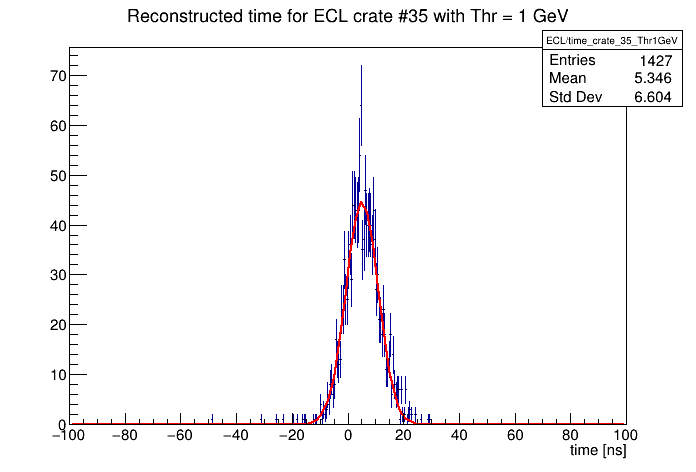

In [26]:
hist1.Draw()
canvas.Draw()

In [9]:
print('Crate     Mean                   MeanError                  Sigma              SigmaError')
for i in range(1, 53):
    obj_name = f'ECL/time_crate_{i}_Thr1GeV'
    hist = runfile.FindObjectAny(obj_name)
    fit = hist.Fit("gaus", 'QS')
    #print(f"{i}     {fit.Parameter(1):10.5f}")
    print(i, '   ', fit.Parameter(1),'   ', fit.ParError(1), '   ', fit.Parameter(2), '   ', fit.ParError(2))

Crate     Mean                   MeanError                  Sigma              SigmaError
1     3.30450362582274     0.1998142106200439     6.131897633575914     0.1681668909653875
2     4.05326636441513     0.16306420240477743     5.620927805850544     0.12542396594004224
3     4.149135931327759     0.16522654702059705     5.8104033621683895     0.12928448491028544
4     6.339719540359174     0.15177256521641383     5.547067202451404     0.11994718670935978
5     5.321927463337151     0.1732592636149459     5.900466647830543     0.1346137250260182
6     5.363539852311325     0.175538476388927     5.752540846637391     0.14801001459521856
7     4.485853469985783     0.16209982619112273     5.473569235964984     0.1396669822930945
8     3.1897588595055844     0.16615255121932992     5.639562026841463     0.12938968373728388
9     3.343470432532864     0.16080573190609573     5.21147024245597     0.12125035815677565
10     3.49253829598241     0.17060961166608524     5.424817334785218   

In [10]:
adc_flag = runfile.FindObjectAny('ECL/adc_flag')

In [11]:
type(adc_flag)

ROOT.TH1F

In [12]:
rtype = runfile.FindObjectAny('DQMInfo/rtype')

In [13]:
type(rtype)

ROOT.TH1F

In [14]:
runtype = rtype.GetTitle()

In [15]:
type(runtype)

str